# nox3.ipynbをもとにした2024年改訂版

* 月平均のNOX$c(t)$の代わりに、測定時刻から24時間前までのNOX値を使う。
* また、インパルス応答$w(t)$として指数関数を導入する。
* 流量を信じるのをやめ、雨量から水量を推定する。
* 雨量データの読みだし等は`level/level.ipynb`を参照。

In [1]:
try:
    # On Google Colab
    from google.colab import drive

    drive.mount("/content/drive")

    BASEDIR = (
        "drive/MyDrive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/air/"
    )
    ! pip install japanize_matplotlib
except:
    BASEDIR = "./"


,unixtime,datetime,19202030,19204010,19206010,19441030
0,1238511600,2009-04-01 00:00:00+09:00,9.0,21.0,27.0,22.0
1,1238515200,2009-04-01 01:00:00+09:00,7.0,21.0,34.0,12.0
2,1238518800,2009-04-01 02:00:00+09:00,7.0,18.0,37.0,17.0
3,1238522400,2009-04-01 03:00:00+09:00,8.0,18.0,24.0,35.0
4,1238526000,2009-04-01 04:00:00+09:00,8.0,22.0,26.0,36.0
...,...,...,...,...,...,...
105187,1617184800,2021-03-31 19:00:00+09:00,6.0,5.0,8.0,9.0
105188,1617188400,2021-03-31 20:00:00+09:00,4.0,4.0,8.0,6.0
105189,1617192000,2021-03-31 21:00:00+09:00,4.0,4.0,10.0,6.0
105190,1617195600,2021-03-31 22:00:00+09:00,3.0,6.0,8.0,4.0


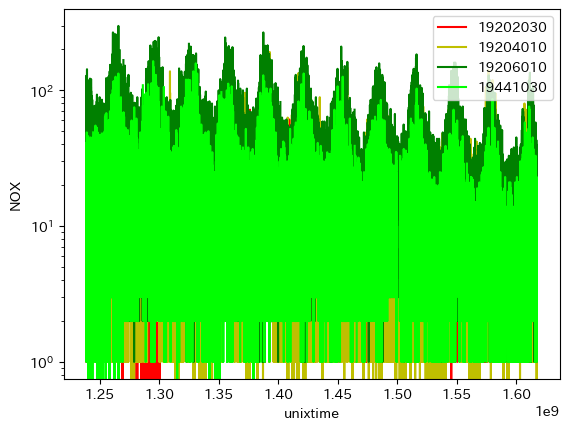

In [16]:
# 指定された局の、全期間のNOX値を抽出する。

import sys
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_ylabel("NOX")

stations = {"19202030": "r", "19204010": "y", "19206010": "g", "19441030": "lime"}

nox = []
for station in stations:
    dfs = []
    for year in range(2009, 2021):
        with open(f"{BASEDIR}19/{year}/j19{year}_{station}.csv") as f:
            df = pd.read_csv(f, parse_dates=[1])  # parse date time in column 1
            dfs.append(df)

    dfs = pd.concat(dfs)

    dfs["datetime"] = pd.to_datetime(dfs["date"]).dt.tz_localize("Asia/Tokyo")
    dfs["unixtime"] = dfs["datetime"].astype(int) // 10**9
    dfs.index = dfs.unixtime
    if len(nox) == 0:
        nox.append(dfs.datetime)

    # print(dfs.head())
    # 月単位にグループ化します。
    # grouped_df = dfs["NOX"].groupby(pd.Grouper(level="date", freq="M"))

    # 各グループの平均値を計算します。
    # mean_df = grouped_df.mean()
    mean_df = dfs["NOX"]

    # 結果を表示します。
    # print(mean_df)
    mean_df.plot(color=stations[station], ax=ax, label=station)
    nox.append(mean_df)


nox = pd.concat(nox, axis=1)
nox.columns = ["datetime"] + list(stations)
nox = nox.reset_index(drop=False)

# plt.plot(mean_df["NOX"])
plt.yscale("log")
plt.legend()
nox

流量は不要だが、川の窒素濃度の量と時刻が必要。`level`のコードを流用する。

In [3]:
sys.path.insert(0, "..")
from level.level import scan_data

大月雨量 = scan_data("大月雨量", BASEDIR)
大月雨量

/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/air/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)
/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/air/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)
/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/air/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)
/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖

04/01 00:00
07/01 00:00
03/01 00:00
01/01 00:00


/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/air/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)
/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/air/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)
/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/air/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)


02/01 00:00
08/01 00:00
11/01 00:00


/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/air/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)
/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/air/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)
/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/air/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)


09/01 00:00
06/01 00:00
05/01 00:00


/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/air/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)
/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/air/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)
/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/air/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)
/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖

05/01 00:00
06/01 00:00
12/01 00:00
08/01 00:00


/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/air/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)
/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/air/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)
/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/air/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)


11/01 00:00
10/01 00:00
09/01 00:00


/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/air/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)
/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/air/../level/level.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.datetime = pd.to_datetime(df.datetime)


07/01 00:00
04/01 00:00


,datetime,大月雨量
0,2005-01-01 00:00:00+09:00,0.0
1,2005-01-01 01:00:00+09:00,0.0
2,2005-01-01 02:00:00+09:00,0.0
3,2005-01-01 03:00:00+09:00,0.0
4,2005-01-01 04:00:00+09:00,0.0
...,...,...
667,2023-02-28 19:00:00+09:00,0.0
668,2023-02-28 20:00:00+09:00,0.0
669,2023-02-28 21:00:00+09:00,0.0
670,2023-02-28 22:00:00+09:00,0.0


In [325]:
from level.level import delayed_data

precip = delayed_data(大月雨量.大月雨量, lookback=24)[:, ::-1]  # 左右反転しておく。
# 時刻がずれると困るので、pandasに戻す。
precip = pd.DataFrame(precip)
# print(w.shape, 大月雨量.shape)
precip = pd.concat([大月雨量.reset_index(drop=False).datetime, precip], axis=1)
print(precip)
precip = precip.dropna(axis=0, how="any")
precip

                        datetime    0    1    2    3    4    5    6    7    8  \
0      2005-01-01 00:00:00+09:00  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1      2005-01-01 01:00:00+09:00  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2      2005-01-01 02:00:00+09:00  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN   
3      2005-01-01 03:00:00+09:00  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN   
4      2005-01-01 04:00:00+09:00  0.0  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN   
...                          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
133374 2023-02-28 19:00:00+09:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
133375 2023-02-28 20:00:00+09:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
133376 2023-02-28 21:00:00+09:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
133377 2023-02-28 22:00:00+09:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
133378 2023-02-28 23:00:00+09:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        ...   14   15   16 

/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/air/../level/level.py:73: RuntimeWarning: invalid value encountered in divide
  X_ = np.zeros([L, lookback]) / 0


,datetime,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
23,2005-01-01 23:00:00+09:00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,2005-01-02 00:00:00+09:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,2005-01-02 01:00:00+09:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,2005-01-02 02:00:00+09:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,2005-01-02 03:00:00+09:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133374,2023-02-28 19:00:00+09:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133375,2023-02-28 20:00:00+09:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133376,2023-02-28 21:00:00+09:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133377,2023-02-28 22:00:00+09:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


オレンジの点は実測値、一番上の面がフィッティング、緑の面が大気以外(畑と森)からの寄与(流量のみに依存するので平坦)、青が大気からの寄与(流量 F と NOX 濃度 c の両方に依存するので曲がる)


大気窒素もdelayed_dataを作っておくと便利

In [326]:
from level.level import delayed_data

nox_delay = delayed_data(nox["19204010"], lookback=24)[:, ::-1]  # 左右反転しておく。
# 時刻がずれると困るので、pandasに戻す。
nox_delay = pd.DataFrame(nox_delay)
# print(w.shape, 大月雨量.shape)
nox_delay = pd.concat([nox.reset_index(drop=False).datetime, nox_delay], axis=1)
print(nox_delay)
nox_delay = nox_delay.dropna(axis=0, how="any")
nox_delay

                        datetime     0     1     2     3     4    5    6    7  \
0      2009-04-01 00:00:00+09:00  21.0   NaN   NaN   NaN   NaN  NaN  NaN  NaN   
1      2009-04-01 01:00:00+09:00  21.0  21.0   NaN   NaN   NaN  NaN  NaN  NaN   
2      2009-04-01 02:00:00+09:00  18.0  21.0  21.0   NaN   NaN  NaN  NaN  NaN   
3      2009-04-01 03:00:00+09:00  18.0  18.0  21.0  21.0   NaN  NaN  NaN  NaN   
4      2009-04-01 04:00:00+09:00  22.0  18.0  18.0  21.0  21.0  NaN  NaN  NaN   
...                          ...   ...   ...   ...   ...   ...  ...  ...  ...   
105187 2021-03-31 19:00:00+09:00   5.0   6.0   7.0   7.0   7.0  6.0  7.0  6.0   
105188 2021-03-31 20:00:00+09:00   4.0   5.0   6.0   7.0   7.0  7.0  6.0  7.0   
105189 2021-03-31 21:00:00+09:00   4.0   4.0   5.0   6.0   7.0  7.0  7.0  6.0   
105190 2021-03-31 22:00:00+09:00   6.0   4.0   4.0   5.0   6.0  7.0  7.0  7.0   
105191 2021-03-31 23:00:00+09:00   6.0   6.0   4.0   4.0   5.0  6.0  7.0  7.0   

          8  ...    14    1

/Users/matto/My Drive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/air/../level/level.py:73: RuntimeWarning: invalid value encountered in divide
  X_ = np.zeros([L, lookback]) / 0


,datetime,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
23,2009-04-01 23:00:00+09:00,14.0,8.0,14.0,16.0,34.0,44.0,39.0,34.0,36.0,...,27.0,24.0,27.0,26.0,13.0,22.0,18.0,18.0,21.0,21.0
24,2009-04-02 00:00:00+09:00,7.0,14.0,8.0,14.0,16.0,34.0,44.0,39.0,34.0,...,26.0,27.0,24.0,27.0,26.0,13.0,22.0,18.0,18.0,21.0
25,2009-04-02 01:00:00+09:00,6.0,7.0,14.0,8.0,14.0,16.0,34.0,44.0,39.0,...,22.0,26.0,27.0,24.0,27.0,26.0,13.0,22.0,18.0,18.0
26,2009-04-02 02:00:00+09:00,6.0,6.0,7.0,14.0,8.0,14.0,16.0,34.0,44.0,...,20.0,22.0,26.0,27.0,24.0,27.0,26.0,13.0,22.0,18.0
27,2009-04-02 03:00:00+09:00,12.0,6.0,6.0,7.0,14.0,8.0,14.0,16.0,34.0,...,18.0,20.0,22.0,26.0,27.0,24.0,27.0,26.0,13.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105187,2021-03-31 19:00:00+09:00,5.0,6.0,7.0,7.0,7.0,6.0,7.0,6.0,6.0,...,6.0,4.0,5.0,3.0,5.0,4.0,4.0,4.0,6.0,8.0
105188,2021-03-31 20:00:00+09:00,4.0,5.0,6.0,7.0,7.0,7.0,6.0,7.0,6.0,...,10.0,6.0,4.0,5.0,3.0,5.0,4.0,4.0,4.0,6.0
105189,2021-03-31 21:00:00+09:00,4.0,4.0,5.0,6.0,7.0,7.0,7.0,6.0,7.0,...,7.0,10.0,6.0,4.0,5.0,3.0,5.0,4.0,4.0,4.0
105190,2021-03-31 22:00:00+09:00,6.0,4.0,4.0,5.0,6.0,7.0,7.0,7.0,6.0,...,7.0,7.0,10.0,6.0,4.0,5.0,3.0,5.0,4.0,4.0


川の窒素濃度

In [327]:
river_N = pd.read_csv("../flow/大月橋.N.csv")
# datetimeに変換し、分を省く
river_N.datetime = pd.to_datetime(river_N.datetime).dt.floor("h")
river_N

,unixtime,datetime,value
0,956120700,2000-04-19 14:00:00+09:00,1.7
1,957933840,2000-05-10 13:00:00+09:00,1.6
2,960352020,2000-06-07 13:00:00+09:00,1.6
3,962769960,2000-07-05 13:00:00+09:00,1.7
4,965191260,2000-08-02 13:00:00+09:00,1.4
...,...,...,...
259,1636001400,2021-11-04 13:00:00+09:00,1.0
260,1638420480,2021-12-02 13:00:00+09:00,1.1
261,1641443520,2022-01-06 13:00:00+09:00,1.1
262,1643863800,2022-02-03 13:00:00+09:00,1.1


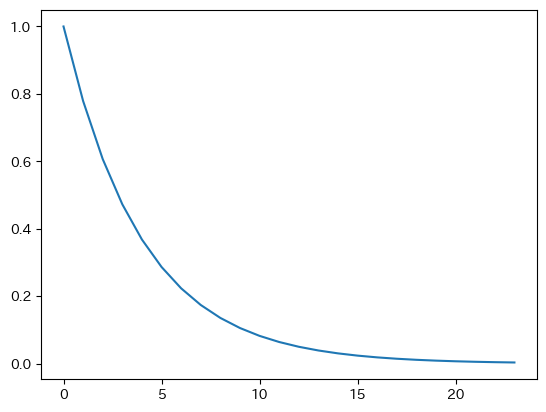

In [336]:
import numpy as np

# インパルス応答は6時間で1/eに落ちる減衰関数。
decay_time = 4  # hours
xtick = np.arange(0, 24)
impulse_response = np.exp(-xtick / decay_time)
# impulse_response = 6 / (xtick + 1) ** 0.65 - 15000 / (xtick + 5) ** 5
plt.plot(impulse_response)

In [337]:
P = pd.merge(river_N, precip, on="datetime", how="left")
P

,unixtime,datetime,value,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,956120700,2000-04-19 14:00:00+09:00,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,957933840,2000-05-10 13:00:00+09:00,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,960352020,2000-06-07 13:00:00+09:00,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,962769960,2000-07-05 13:00:00+09:00,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,965191260,2000-08-02 13:00:00+09:00,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,1636001400,2021-11-04 13:00:00+09:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260,1638420480,2021-12-02 13:00:00+09:00,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261,1641443520,2022-01-06 13:00:00+09:00,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262,1643863800,2022-02-03 13:00:00+09:00,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [338]:
c = pd.merge(river_N, nox_delay, on="datetime", how="left")
c

,unixtime,datetime,value,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,956120700,2000-04-19 14:00:00+09:00,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,957933840,2000-05-10 13:00:00+09:00,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,960352020,2000-06-07 13:00:00+09:00,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,962769960,2000-07-05 13:00:00+09:00,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,965191260,2000-08-02 13:00:00+09:00,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,1636001400,2021-11-04 13:00:00+09:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,1638420480,2021-12-02 13:00:00+09:00,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,1641443520,2022-01-06 13:00:00+09:00,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,1643863800,2022-02-03 13:00:00+09:00,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [339]:
wc = c.to_numpy()[:, -24:] @ impulse_response
wcP = (c.to_numpy()[:, -24:] * P.to_numpy()[:, -24:]) @ impulse_response
wP = P.to_numpy()[:, -24:] @ impulse_response
cr = river_N.value
wc, wcP, wP, cr

(array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, 82.22165855684138, 85.52108456589265,
        73.91280993443627, 95.46812573856948, 86.71507776440811,
        104.80278875489633, 84.59524704233266, 137.59260642693965,
        70.87359399744336, 75.03077435620949, 120.66346897348915,
        70.5449553577403, 145.04126358524908, 61.42950974981831, nan,
        73.26566569556431, 47.34863253840519, 42.19151096367582,
        63.991349

In [340]:
Xy = pd.DataFrame([wc, wcP, wP, cr]).transpose().dropna(axis=0)
wc1 = Xy.iloc[:, 0]
wcP1 = Xy.iloc[:, 1]
wP1 = Xy.iloc[:, 2]
cr1 = Xy.iloc[:, 3]

87個しかない。

In [341]:
import scipy
from dataclasses import dataclass
from typing import Union


@dataclass
class AvgStd:
    avg: Union[float, np.ndarray]
    std: Union[float, np.ndarray]


def trend(w, B, C, D, E, F):
    wc, wcP, wP = w
    return (B * wc + C * wcP + D) / (F * wP + 1) + E


def trend_error(w, B: AvgStd, C: AvgStd, D: AvgStd, E: AvgStd, F: AvgStd):
    """誤差の評価。

    Args:
        w (_type_): _description_
        B (AvgStd): _description_
        C (AvgStd): _description_
        D (AvgStd): _description_
        E (AvgStd): _description_
        F (AvgStd): _description_
    """

    def add3(a, b, c):
        return add(add(a, b), c)

    def add(a, b):
        return AvgStd(avg=a.avg + b.avg, std=(a.std**2 + b.std**2) ** 0.5)

    def div(a: AvgStd, b: AvgStd):
        cavg = a.avg / b.avg
        cstd = ((a.std / a.avg) ** 2 + (b.std / b.avg) ** 2) ** 0.5 * cavg
        return AvgStd(cavg, cstd)

    def mulc(a: AvgStd, c: float):
        return AvgStd(a.avg * c, a.std * c)

    def addc(a: AvgStd, c: float):
        return AvgStd(a.avg + c, a.std)

    wc, wcP, wP = w
    return add(div(add3(mulc(B, wc), mulc(C, wcP), D), addc(mulc(F, wP), 1)), E)


popt, pcov = scipy.optimize.curve_fit(trend, (wc1, wcP1, wP1), cr1)
B, C, D, E, F = popt
popt

array([ 0.00125951, -0.00223035, -0.09928621,  1.18902227,  1.0717348 ])

In [342]:
errors = np.diagonal(pcov) ** 0.5
errors

array([4.87894018e-04, 8.85394723e-03, 1.95313812e-01, 1.87952543e-01,
       5.18944187e+00])

<ErrorbarContainer object of 3 artists>

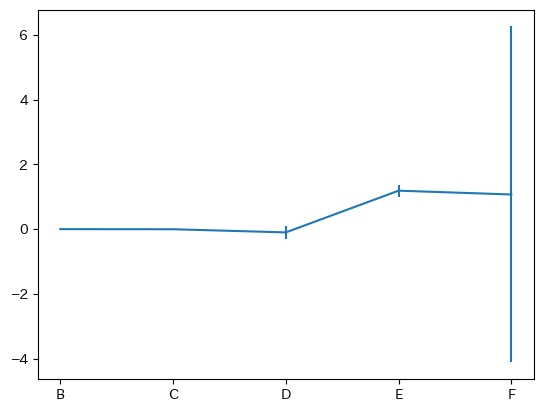

In [343]:
plt.errorbar(["B", "C", "D", "E", "F"], popt, yerr=errors)

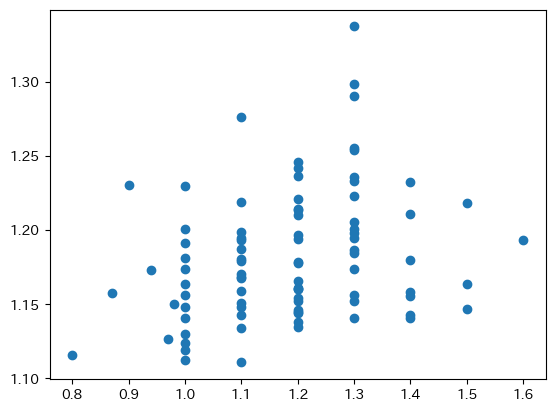

[[1.         0.28244551]
 [0.28244551 1.        ]]


(0.0, 2.0)

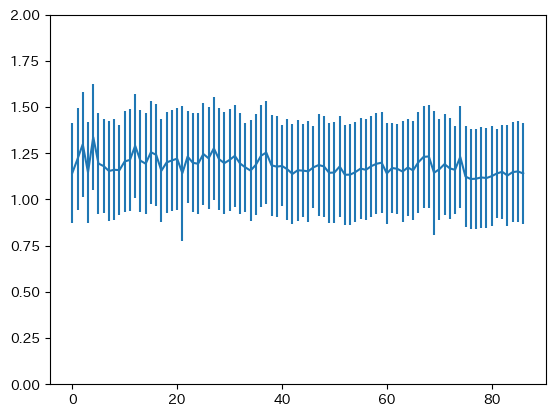

In [344]:
Berror, Cerror, Derror, Eerror, Ferror = np.diagonal(pcov) ** 0.5

pred = trend((wc1, wcP1, wP1), B, C, D, E, F)
errors = trend_error(
    (wc1, wcP1, wP1),
    AvgStd(B, Berror),
    AvgStd(C, Cerror),
    AvgStd(D, Derror),
    AvgStd(E, Eerror),
    AvgStd(F, Ferror),
)
plt.plot(cr1, pred, "o")
plt.show()
print(np.corrcoef(cr1, pred))
plt.errorbar(x=np.arange(pred.shape[0]), y=pred, yerr=errors.std)
plt.ylim(0, 2)

In [345]:
list(errors.std)

[0.2718407347810128,
 0.2756227618392846,
 0.2828802364848899,
 0.2719584593306131,
 0.2875505300631025,
 0.27408153386647177,
 0.25452502352473766,
 0.27220854112639603,
 0.2724489450761612,
 0.24224579831232682,
 0.27476492250063184,
 0.27530993132504883,
 0.2820130405888473,
 0.2750265433016701,
 0.2740377409357236,
 0.27855840174011137,
 0.27739041391271946,
 0.2793729066174756,
 0.2744392445893242,
 0.27511430265947046,
 0.27577421817526,
 0.36528646896492806,
 0.24882993043231275,
 0.26694837024784007,
 0.27205982649743565,
 0.2777424802598347,
 0.27592021625509483,
 0.2805456302162508,
 0.2755765911094354,
 0.2741996106168013,
 0.27529375385472116,
 0.27632443109200966,
 0.2741044464671256,
 0.24037405090662556,
 0.27229124851818487,
 0.27366771339102214,
 0.27696207236746667,
 0.27842884133855805,
 0.2735539514491633,
 0.2731931096907864,
 0.21925249351847334,
 0.27257503567261215,
 0.27171053537644974,
 0.2723490138273945,
 0.24973095416943944,
 0.2721450814738673,
 0.22242299

In [346]:
pred

125    1.142877
127    1.218664
128    1.298626
141    1.146750
142    1.337504
         ...   
246    1.149857
247    1.129701
248    1.148074
249    1.151962
250    1.140713
Length: 87, dtype: float64

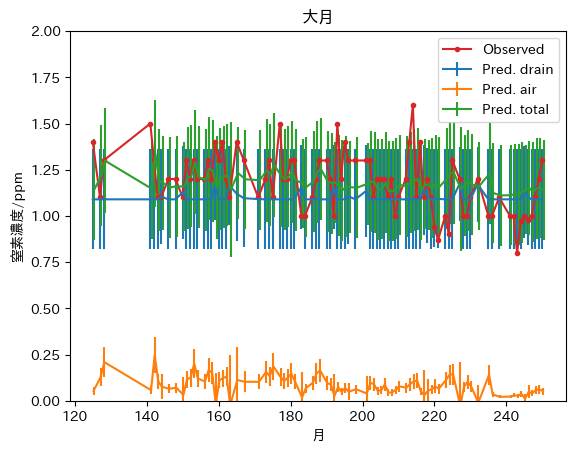

In [347]:
drain = trend((wc1, wcP1, wP1), 0, 0, D, E, F)
drain_errors = trend_error(
    (wc1, wcP1, wP1),
    AvgStd(0, 0),
    AvgStd(0, 0),
    AvgStd(D, Derror),
    AvgStd(E, Eerror),
    AvgStd(F, Ferror),
)
air = trend((wc1, wcP1, wP1), B, C, 0, 0, F)
air_errors = trend_error(
    (wc1, wcP1, wP1),
    AvgStd(B, Berror),
    AvgStd(C, Cerror),
    AvgStd(0, 0),
    AvgStd(0, 0),
    AvgStd(F, Ferror),
)
plt.errorbar(drain.index, drain, yerr=drain_errors.std, label="Pred. drain")
plt.errorbar(air.index + 0.2, air, yerr=air_errors.std, label="Pred. air")
plt.errorbar(pred.index + 0.4, pred, yerr=errors.std, label="Pred. total ")
# plt.plot(trend((wc1, wcP1, wP1), B, C, D, E, F), ".-")
plt.plot(cr1, ".-", label="Observed")
plt.ylim(0, 2)
plt.title("大月")
plt.xlabel("月")
plt.ylabel("窒素濃度/ppm")
plt.legend()

In [348]:
pcov

array([[ 2.38040573e-07, -7.28850471e-07, -1.95230214e-05,
         1.52747653e-06,  4.57054481e-04],
       [-7.28850471e-07,  7.83923815e-05,  1.12385358e-03,
        -1.06230829e-03, -2.08844884e-02],
       [-1.95230214e-05,  1.12385358e-03,  3.81474851e-02,
        -3.58991501e-02,  2.66615403e-01],
       [ 1.52747653e-06, -1.06230829e-03, -3.58991501e-02,
         3.53261583e-02, -2.96544135e-01],
       [ 4.57054481e-04, -2.08844884e-02,  2.66615403e-01,
        -2.96544135e-01,  2.69303069e+01]])

ほかの観測地点での計算も、大月の降水量を利用することにする。

大気質については、前回同様近くの測定局の値を用いる。

このモデルは、流量自体も回帰で推定している。それが実際の流量(といっても信頼に足る情報があまりないが)と近いのかどうかよくわからない。

Fの値は0.3ぐらい、それに定数1を足すので、雨が降らないときが1、毎時1mmの降雨に0.3ぐらい増えるという感じか。

水量をプロットしてみよう。(縦軸、横軸はてきとう)

In [349]:
# 検証用に、流量も読んでおく。
river_flow = pd.read_csv("../flow/大月橋.flow.csv")
# datetimeに変換し、分を省く
river_flow.datetime = pd.to_datetime(river_flow.datetime).dt.floor("h")
river_flow

,unixtime,datetime,value
0,956120700,2000-04-19 14:00:00+09:00,2.0700
1,957933840,2000-05-10 13:00:00+09:00,5.5200
2,960352020,2000-06-07 13:00:00+09:00,2.3100
3,962769960,2000-07-05 13:00:00+09:00,5.3000
4,965191260,2000-08-02 13:00:00+09:00,4.8000
...,...,...,...
261,1635984900,2021-11-04 09:00:00+09:00,2.3989
262,1638403500,2021-12-02 09:00:00+09:00,1.9112
263,1641428040,2022-01-06 09:00:00+09:00,2.2199
264,1643847000,2022-02-03 09:00:00+09:00,1.7425


In [350]:
# 流量を測定した時刻からさかのぼること24時間の雨量
P2 = pd.merge(river_flow, precip, on="datetime", how="left")
P2

,unixtime,datetime,value,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,956120700,2000-04-19 14:00:00+09:00,2.0700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,957933840,2000-05-10 13:00:00+09:00,5.5200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,960352020,2000-06-07 13:00:00+09:00,2.3100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,962769960,2000-07-05 13:00:00+09:00,5.3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,965191260,2000-08-02 13:00:00+09:00,4.8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,1635984900,2021-11-04 09:00:00+09:00,2.3989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262,1638403500,2021-12-02 09:00:00+09:00,1.9112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
263,1641428040,2022-01-06 09:00:00+09:00,2.2199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
264,1643847000,2022-02-03 09:00:00+09:00,1.7425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


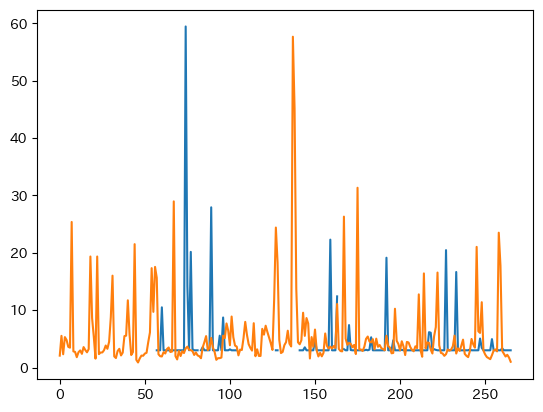

In [351]:
wP2 = P2.to_numpy()[:, -24:] @ impulse_response

plt.plot((F * wP2 + 1) * 3)
plt.plot(P2.value)

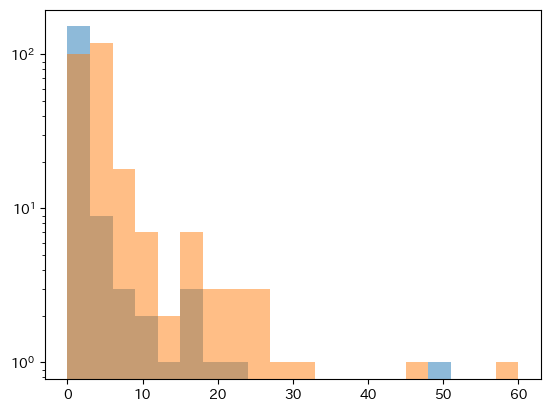

In [353]:
plt.hist((F * wP2 + 1) * 2.5, alpha=0.5, bins=20, range=(0, 60))
plt.hist(P2.value, alpha=0.5, bins=20, range=(0, 60))
plt.yscale("log")

decayを4時間にすると、かなり流量とF*wP+1が似た感じになる。